In [ ]:
# !pip install pyspark

In [ ]:
# import os
# from pyspark.sql import SparkSession

In [ ]:
# spark_home = "D:\Ali_Kolya\FIFA_Players_Analysis"

In [ ]:
# os.environ["SPARK_HOME"] = spark_home

# # Add Spark bin and executors to PATH
# os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "bin")
# os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "sbin")

# # Add Spark Python libraries to PYTHONPATH
# os.environ["PYTHONPATH"] = os.path.join(spark_home, "python") + os.pathsep + os.environ.get("PYTHONPATH", "")
# os.environ["PYTHONPATH"] += os.pathsep + os.path.join(spark_home, "python", "lib")

# # Add PySpark to the system path
# os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "python", "lib", "pyspark.zip")
# os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "python", "lib", "py4j-0.10.9-src.zip")

# os.environ['PYSPARK_DRIVER_PYTHON'] = 'jupyter'
# os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = 'lab'
# os.environ['PYSPARK_PYTHON'] = 'python'

In [ ]:
# # Create a SparkSession
# spark = SparkSession.builder \
#     .appName("PySpark-Script") \
#     .getOrCreate()

In [ ]:
# data = [("Alice", 25), ("Bob", 30), ("Charlie", 35)]
# rdd = spark.sparkContext.parallelize(data)
# rdd_length = len(rdd.collect())
# print("Total number of elements: ", rdd_length)

# Data Cleaning

# Preprocessing

# Feature Extraction

# EDA

# Model Development

# Reading the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('Data/male_players_23.csv')
df = pd.read_csv('Data/male_players (legacy)_23.csv')
print(len(df))


161583


C:\Users\BoodyBeeh\AppData\Local\Temp\ipykernel_19592\2782358923.py:7: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/male_players (legacy)_23.csv')


In [3]:
df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB


<Axes: >

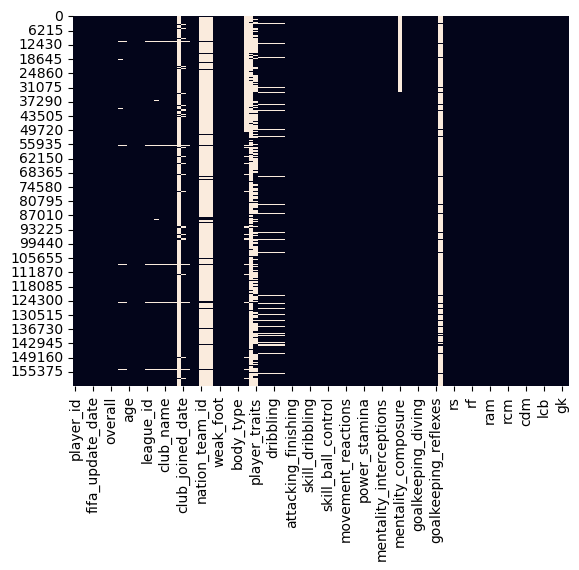

In [5]:
sns.heatmap(df.isnull(), cbar = False)
# Data has lots of missing values

In [6]:
# Total number of nulls
df.isnull().sum().sum()

1218702

In [7]:
# Nulls in each column
nulls = df.isnull().sum() 
print(nulls[nulls > 0])

value_eur                           2053
wage_eur                            1761
league_id                           1773
league_name                         1773
league_level                        2717
club_team_id                        1773
club_name                           1773
club_position                       1773
club_jersey_number                  1773
club_loaned_from                  152045
club_joined_date                   11311
club_contract_valid_until_year      1773
nation_team_id                    152267
nation_position                   152267
nation_jersey_number              152267
release_clause_eur                 57961
player_tags                       148920
player_traits                      88433
pace                               17969
shooting                           17969
passing                            17969
dribbling                          17969
defending                          17969
physic                             17969
mentality_compos

In [8]:
# Showing it as percentages
print(nulls[nulls > 0] / len(df) * 100)

value_eur                          1.270554
wage_eur                           1.089842
league_id                          1.097269
league_name                        1.097269
league_level                       1.681489
club_team_id                       1.097269
club_name                          1.097269
club_position                      1.097269
club_jersey_number                 1.097269
club_loaned_from                  94.097151
club_joined_date                   7.000118
club_contract_valid_until_year     1.097269
nation_team_id                    94.234542
nation_position                   94.234542
nation_jersey_number              94.234542
release_clause_eur                35.870729
player_tags                       92.163161
player_traits                     54.729148
pace                              11.120601
shooting                          11.120601
passing                           11.120601
dribbling                         11.120601
defending                       

In [9]:
# Drop columns with more than 33% missing values
df = df.dropna(thresh = len(df) / 3 * 2, axis = 1)
nulls = df.isnull().sum() 
print(nulls[nulls > 0] / len(df) * 100)

value_eur                          1.270554
wage_eur                           1.089842
league_id                          1.097269
league_name                        1.097269
league_level                       1.681489
club_team_id                       1.097269
club_name                          1.097269
club_position                      1.097269
club_jersey_number                 1.097269
club_joined_date                   7.000118
club_contract_valid_until_year     1.097269
pace                              11.120601
shooting                          11.120601
passing                           11.120601
dribbling                         11.120601
defending                         11.120601
physic                            11.120601
mentality_composure               20.336917
dtype: float64


In [10]:
# get the type of columns that have nulls
df.dtypes[nulls[nulls > 0].index]

value_eur                         float64
wage_eur                          float64
league_id                         float64
league_name                        object
league_level                      float64
club_team_id                      float64
club_name                          object
club_position                      object
club_jersey_number                float64
club_joined_date                   object
club_contract_valid_until_year    float64
pace                              float64
shooting                          float64
passing                           float64
dribbling                         float64
defending                         float64
physic                            float64
mentality_composure               float64
dtype: object

In [11]:
# get info about this column
# df['release_clause_eur']

In [12]:
df['mentality_composure'].describe()

count    128722.000000
mean         57.816892
std          12.329739
min           3.000000
25%          50.000000
50%          59.000000
75%          66.000000
max          96.000000
Name: mentality_composure, dtype: float64

In [13]:
# Checking for duplicates
df.duplicated().sum()
# No duplicates found

0

In [21]:
# print column names of type object
df.select_dtypes(include = 'object').columns

Index(['short_name', 'player_positions', 'league_name', 'club_name',
       'club_position', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type'],
      dtype='object')

In [20]:
# df['player_url']            # drop
# df['long_name']             # drop
# df['fifa_update_date']      # drop
# df['club_joined_date']      # drop
# df['real_face']             # drop
# df['player_face_url']       # drop
# df['dob']                   # drop

# drop the above attributes
df = df.drop(columns = ['player_url', 'long_name', 'fifa_update_date', 'club_joined_date', 'real_face', 'player_face_url','dob'])


In [16]:
# loop on all the position attrributes and remove the + and whatever comes after
positions = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

for col in positions:
    df[col] = df[col].str.split('+').str[0]
    df[col] = df[col].str.strip()
for col in positions:
    df[col] = df[col].str.split('-').str[0]
    df[col] = df[col].str.strip()
    df[col] = df[col].astype(float)


c:\Users\BoodyBeeh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


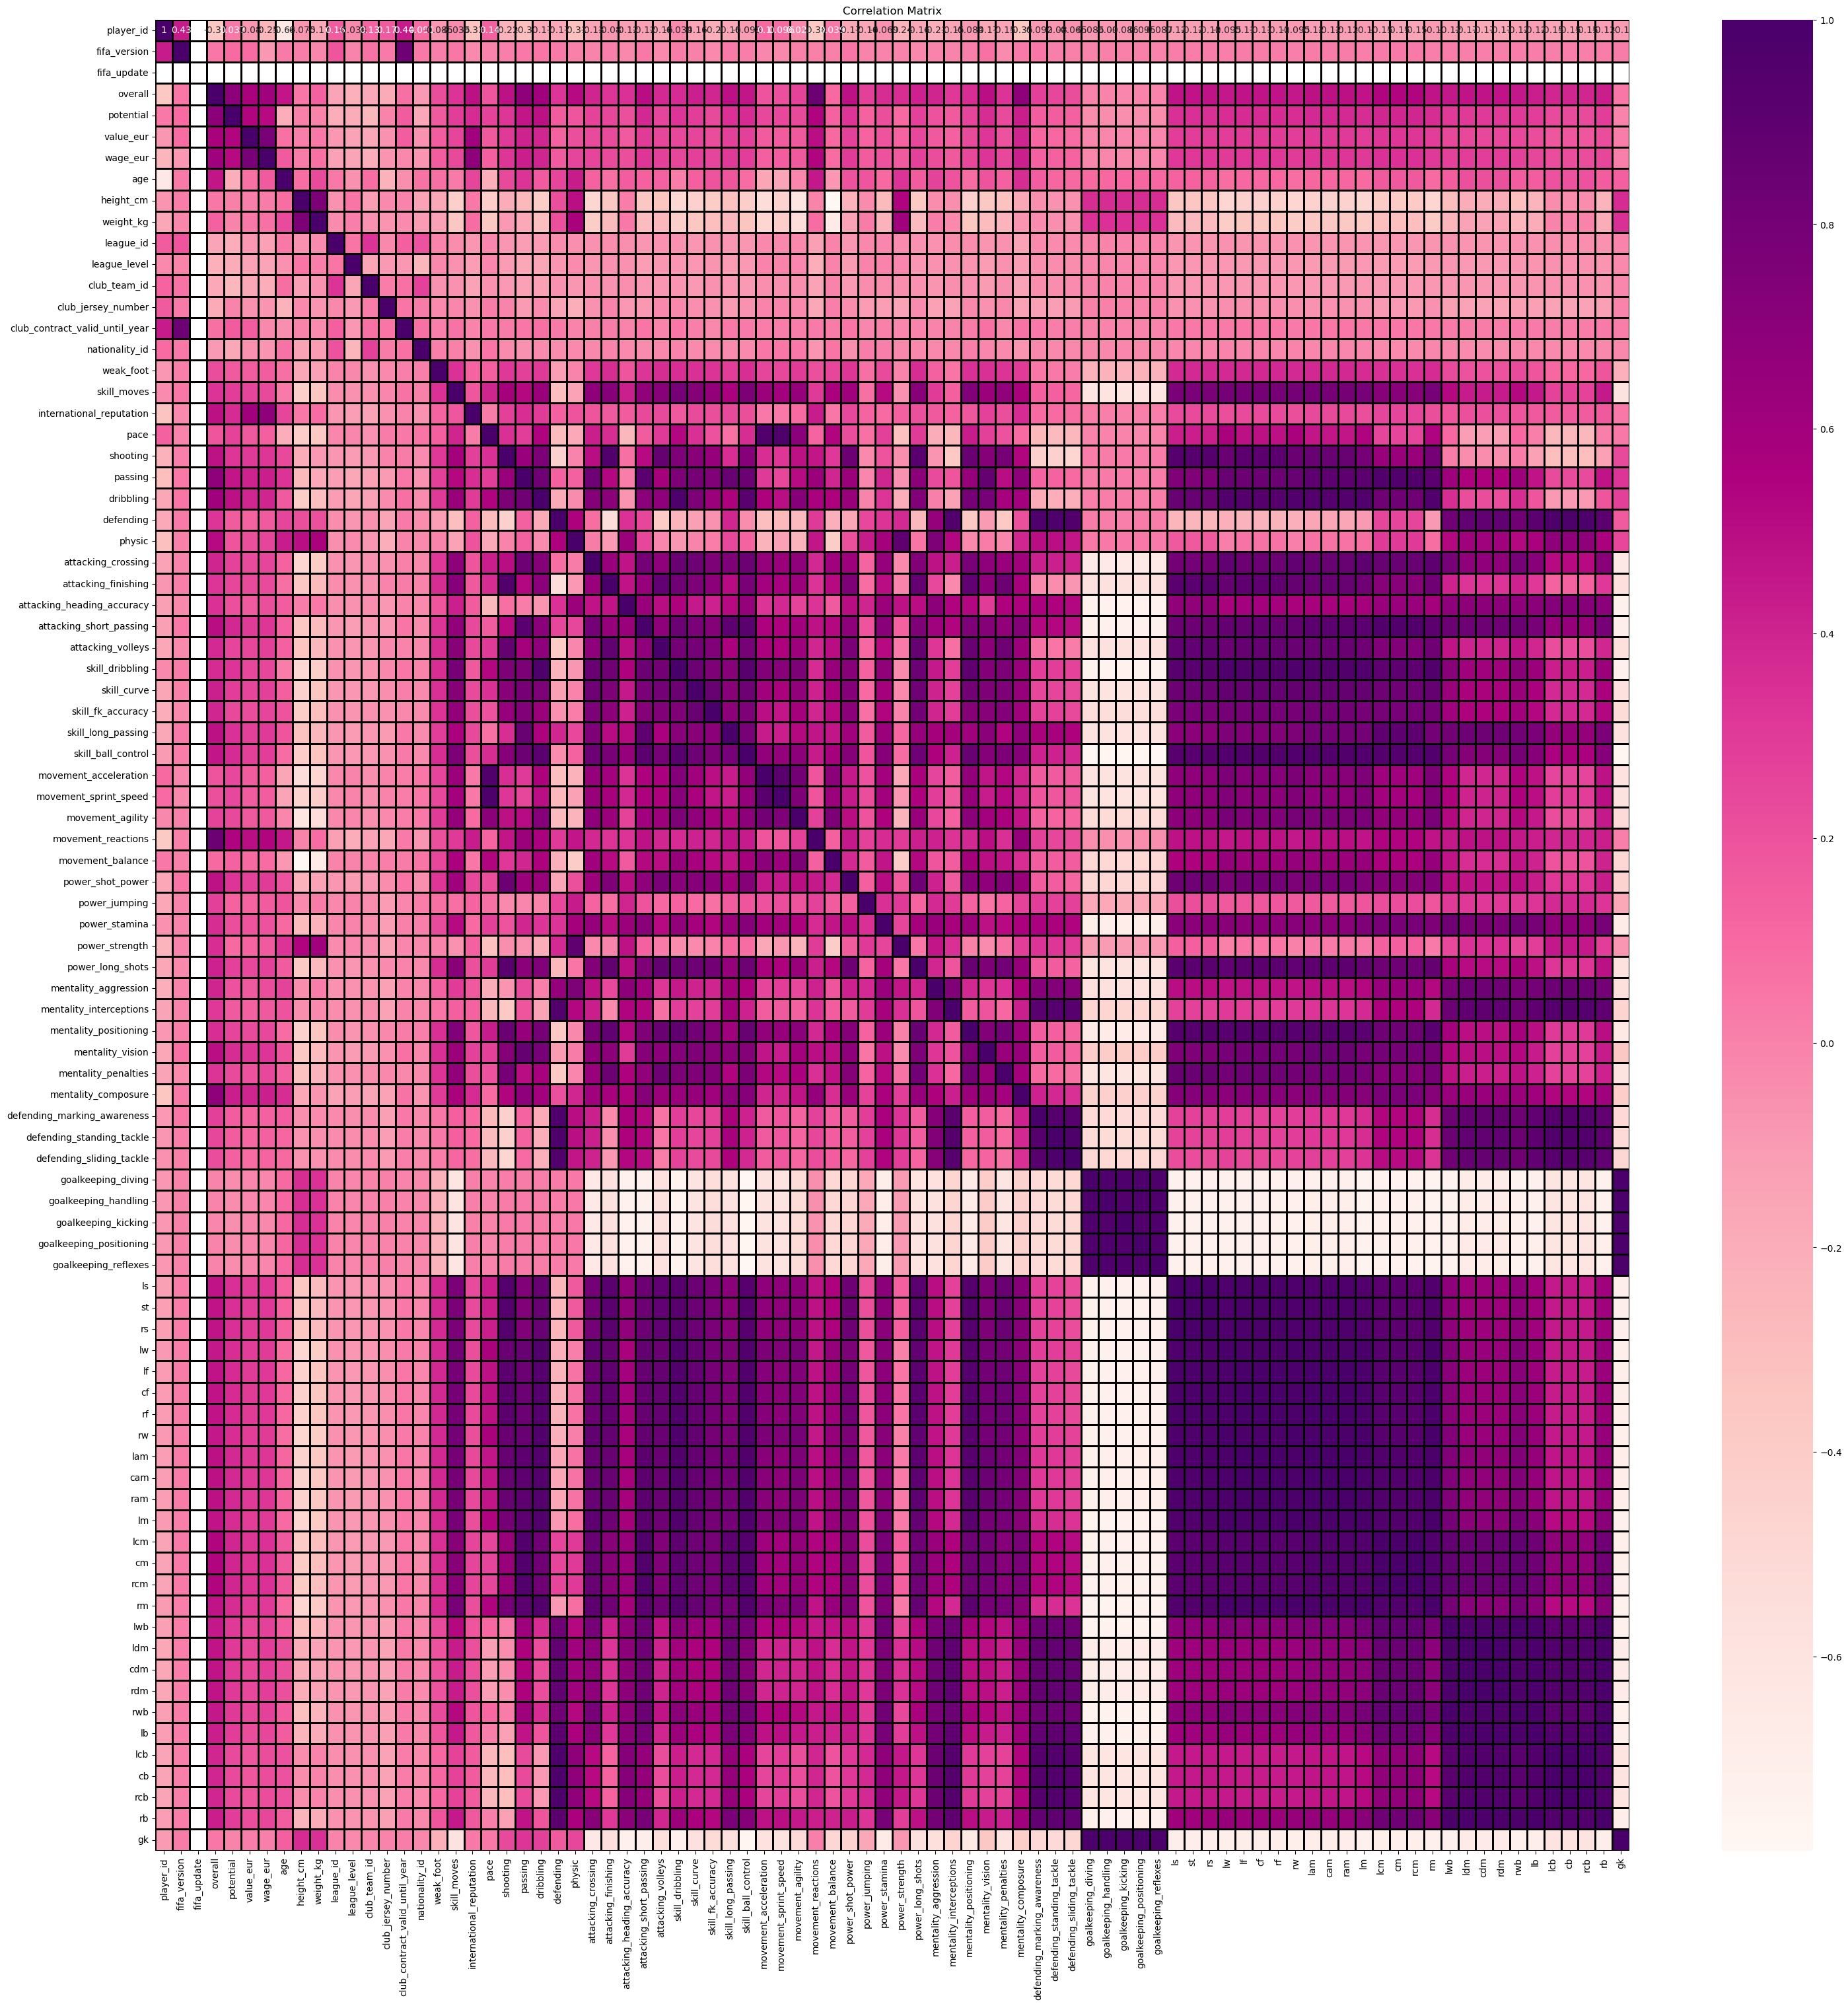

In [27]:
# making a heatmap of the correlation matrix
# df2 = df.copy()
# df2 = df2.drop(columns = ['short_name', 'player_positions', 'league_name', 'club_name',
#        'club_position', 'nationality_name', 'preferred_foot', 'work_rate',
#        'body_type'])

plt.figure(figsize=(18,18))
sns.heatmap(df2.corr(), cbar = True, annot = True, cmap='RdPu', linewidths=1, linecolor='black')
# sns.heatmap(df2.corr(), annot= False, cmap='jet')
plt.title('Correlation Matrix')
plt.show()


In [29]:
df = df.drop(columns = ['fifa_update', 'fifa_version'])

In [32]:
df2 = df.copy()
df2 = df2.drop(columns = ['short_name', 'player_positions', 'league_name', 'club_name',
       'club_position', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type'])

correlation_with_val_eur = df2.corrwith(df2['value_eur'])
sorted_correlations = correlation_with_val_eur.sort_values(ascending=False)
top_15_correlations = sorted_correlations.head(50)
print(top_15_correlations.index.tolist())

['value_eur', 'wage_eur', 'international_reputation', 'overall', 'potential', 'movement_reactions', 'passing', 'mentality_composure', 'dribbling', 'mentality_vision', 'cm', 'lcm', 'rcm', 'shooting', 'lam', 'cam', 'ram', 'cf', 'lf', 'rf', 'attacking_short_passing', 'lm', 'rm', 'rs', 'st', 'ls', 'rw', 'lw', 'skill_long_passing', 'skill_ball_control', 'power_shot_power', 'skill_curve', 'skill_moves', 'attacking_volleys', 'ldm', 'cdm', 'rdm', 'skill_dribbling', 'rwb', 'lwb', 'power_long_shots', 'mentality_positioning', 'attacking_crossing', 'attacking_finishing', 'skill_fk_accuracy', 'rb', 'lb', 'physic', 'mentality_penalties', 'power_stamina']
